# Machine Learning 3   



Dataset from Kaggle: **"Heart Disease Dataset"** by *Mazaharul Hasnine Mirza   
Source: https://www.kaggle.com/datasets/mirzahasnine/heart-disease-dataset

Now we will be using logistic regression as part of our Machine Learning models. Logistic regression models discrete data and return in a form of probability, given an input variable.

## Data Preparation

We first import the essential Python libraries. In addition to the four libraries (i.e. numpy, pandas, seaborn and matplotlib.pyplot) that we have imported previously, we also import eli5, which is a Python package which helps to debug machine learning classifiers and explain their predictions.

In [7]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set

import eli5

In [8]:
heart_dis=pd.read_csv('heart_dis_cln.csv')
heart_dis

,Unnamed: 0,GENDER,AGE,AGEGROUP,EDUCATION,CURRENT_SMOKER,CIGS_PER_DAY,BP_MEDICATION,PREV_STROKE,PREV_HYPERTENSION,DIABETES,TOT_CHOLESTEROL,SYSTOLIC_BP,DIASTOLIC_BP,BMI,HEART_RATE,GLUCOSE_LEVEL,HEART_STROKE
0,0,Male,39,30-39,Postgraduate,False,0.0,False,False,False,False,195.0,106.0,70.0,26.97,80.0,77.0,False
1,1,Female,46,40-49,Primary School,False,0.0,False,False,False,False,250.0,121.0,81.0,28.73,95.0,76.0,False
2,2,Male,48,40-49,Uneducated,True,20.0,False,False,False,False,245.0,127.5,80.0,25.34,75.0,70.0,False
3,3,Female,61,60-69,Graduate,True,30.0,False,False,True,False,225.0,150.0,95.0,28.58,65.0,103.0,True
4,4,Female,46,40-49,Graduate,True,23.0,False,False,False,False,285.0,130.0,84.0,23.10,85.0,85.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,4232,Male,68,60-69,Uneducated,False,0.0,False,False,True,False,176.0,168.0,97.0,23.14,60.0,79.0,True
3649,4233,Male,50,50-59,Uneducated,True,1.0,False,False,True,False,313.0,179.0,92.0,25.97,66.0,86.0,True
3650,4234,Male,51,50-59,Graduate,True,43.0,False,False,False,False,207.0,126.5,80.0,19.71,65.0,68.0,False
3651,4235,Female,48,40-49,Primary School,True,20.0,NotDefined,False,False,False,248.0,131.0,72.0,22.00,84.0,86.0,False


## OneHotEncoder (encode categorical variables)

This model encodes categorical features as a one-hot numeric array. In this strategy, each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column.

More details at:

* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
* https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd
Import the essential libraries.

> OneHotEncoder: Encode categorical features as a one-hot numeric array.

We create a OneHotEncoder object and fit it using our data. Below shows the data types of the initial categorical variables after encoding.

In [9]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()

heart_dis_cat=heart_dis[["GENDER", "AGEGROUP", "EDUCATION", "CURRENT_SMOKER", "BP_MEDICATION", "PREV_STROKE", "PREV_HYPERTENSION", "DIABETES"]]
ohe.fit(heart_dis_cat)
heart_dis_cat_ohe=pd.DataFrame(ohe.transform(heart_dis_cat).toarray(), 
                               columns=ohe.get_feature_names_out(heart_dis_cat.columns))

heart_dis_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   GENDER_Female             3653 non-null   float64
 1   GENDER_Male               3653 non-null   float64
 2   AGEGROUP_30-39            3653 non-null   float64
 3   AGEGROUP_40-49            3653 non-null   float64
 4   AGEGROUP_50-59            3653 non-null   float64
 5   AGEGROUP_60-69            3653 non-null   float64
 6   AGEGROUP_70-79            3653 non-null   float64
 7   EDUCATION_Graduate        3653 non-null   float64
 8   EDUCATION_NotDefined      3653 non-null   float64
 9   EDUCATION_Postgraduate    3653 non-null   float64
 10  EDUCATION_Primary School  3653 non-null   float64
 11  EDUCATION_Uneducated      3653 non-null   float64
 12  CURRENT_SMOKER_False      3653 non-null   float64
 13  CURRENT_SMOKER_True       3653 non-null   float64
 14  BP_MEDIC

We then concatenate the numeric variables, encoded categorical variables, and our response variables together into a single dataframe.

In [10]:
heart_dis_num=heart_dis[["AGE", "CIGS_PER_DAY", "TOT_CHOLESTEROL", "SYSTOLIC_BP", "DIASTOLIC_BP", "BMI", "HEART_RATE", "GLUCOSE_LEVEL"]]
heart_dis_rspd=heart_dis["HEART_STROKE"]

heart_dis_ohe=pd.concat([heart_dis_num, heart_dis_cat_ohe, heart_dis_rspd],
                       sort=False, axis=1).reindex(index=heart_dis_num.index)

heart_dis_ohe["HEART_STROKE"] = heart_dis_ohe["HEART_STROKE"].astype(int)

heart_dis_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AGE                       3653 non-null   int64  
 1   CIGS_PER_DAY              3653 non-null   float64
 2   TOT_CHOLESTEROL           3653 non-null   float64
 3   SYSTOLIC_BP               3653 non-null   float64
 4   DIASTOLIC_BP              3653 non-null   float64
 5   BMI                       3653 non-null   float64
 6   HEART_RATE                3653 non-null   float64
 7   GLUCOSE_LEVEL             3653 non-null   float64
 8   GENDER_Female             3653 non-null   float64
 9   GENDER_Male               3653 non-null   float64
 10  AGEGROUP_30-39            3653 non-null   float64
 11  AGEGROUP_40-49            3653 non-null   float64
 12  AGEGROUP_50-59            3653 non-null   float64
 13  AGEGROUP_60-69            3653 non-null   float64
 14  AGEGROUP

Export the encoded dataset so that we can use it later.

In [11]:
heart_dis_ohe.to_csv('heart_dis_ohe.csv', index=False)

We import the file heart_dis_ohe.csv which contains the ohe-ed data, but not upsampled.

In [12]:
heart_disease_ohe=pd.read_csv('heart_dis_ohe.csv')
heart_disease_ohe.head()

,AGE,CIGS_PER_DAY,TOT_CHOLESTEROL,SYSTOLIC_BP,DIASTOLIC_BP,BMI,HEART_RATE,GLUCOSE_LEVEL,GENDER_Female,GENDER_Male,...,BP_MEDICATION_False,BP_MEDICATION_NotDefined,BP_MEDICATION_True,PREV_STROKE_False,PREV_STROKE_True,PREV_HYPERTENSION_False,PREV_HYPERTENSION_True,DIABETES_False,DIABETES_True,HEART_STROKE
0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
1,46,0.0,250.0,121.0,81.0,28.73,95.0,76.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
2,48,20.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
3,61,30.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1
4,46,23.0,285.0,130.0,84.0,23.10,85.0,85.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0


A glance at the info of our data.

In [13]:
heart_disease_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AGE                       3653 non-null   int64  
 1   CIGS_PER_DAY              3653 non-null   float64
 2   TOT_CHOLESTEROL           3653 non-null   float64
 3   SYSTOLIC_BP               3653 non-null   float64
 4   DIASTOLIC_BP              3653 non-null   float64
 5   BMI                       3653 non-null   float64
 6   HEART_RATE                3653 non-null   float64
 7   GLUCOSE_LEVEL             3653 non-null   float64
 8   GENDER_Female             3653 non-null   float64
 9   GENDER_Male               3653 non-null   float64
 10  AGEGROUP_30-39            3653 non-null   float64
 11  AGEGROUP_40-49            3653 non-null   float64
 12  AGEGROUP_50-59            3653 non-null   float64
 13  AGEGROUP_60-69            3653 non-null   float64
 14  AGEGROUP

We change the data type of `HEART_STROKE` column from `int64` to `category` as required.

In [14]:
heart_disease_ohe["HEART_STROKE"] = heart_disease_ohe["HEART_STROKE"].astype("category")

## Logistic Regression

Here we import the necessary functions requried from sklearn to perform our train and test split, logistic regression model and some sklearn.metrics to visualise our results.

> **train_test_split**: Split arrays or matrices into random train and test subsets.   
> **classification_report**: Build a text report showing the main classification metrics.   
> **accuracy_score**: Accuracy classification score.   
> **f1_score**: Combines the precision and recall of a classifier into a single metric by taking their harmonic mean.   
> **plot_confusion_matrix**: Plot Confusion Matrix.   
> **roc_auc_score**: Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.   
> **balanced_accuracy_score**: Compute the balanced accuracy, which is defined as the average of recall obtained on each class. 
> **mean_squared_error**: A measure of how close a fitted line is to data points.   
> **r2_score**: R^2 (coefficient of determination) regression score function.   
> **LogisticRegression**: A process of modeling the probability of a discrete outcome given an input variable.   

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, plot_confusion_matrix, roc_auc_score, balanced_accuracy_score, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression

Here we split our data into train and test data, where the ratio of 8:2 is applied respectively.

In [16]:
y=pd.DataFrame(heart_disease_ohe["HEART_STROKE"])
X=pd.DataFrame(heart_disease_ohe.drop("HEART_STROKE", axis=1))

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2) #split the data into train:test=8:2
cla_feature_names = X_train.columns.tolist()

Here we define the confusion matrix function for our **train data**.

In [17]:
def confusion_matrix_train(classifier):
    fig, ax = plt.subplots(figsize=(12, 6))
    plot_confusion_matrix(classifier, X_train, y_train, cmap=plt.cm.OrRd, normalize=None, ax=ax)
    ax.set_title("Confusion Matrix (Train Data)", fontsize = 15)
    plt.show()

This is our **logistic regression** function for our **train data**. Here, we fit our data, create predictions for `X_train` and store the results in a classification report which will be useful later.

In [18]:
log_reg = LogisticRegression(C=10, fit_intercept=False, solver='liblinear')
log_reg.fit(X_train, y_train.HEART_STROKE.ravel())
log_reg_predictions_train = log_reg.predict(X_train)
log_reg_results_train = classification_report(y_train, log_reg_predictions_train, zero_division=True, output_dict=True)

This is our **confusion matrix and classification report** for our **train data**. The following description may be useful in our classification report.

> **precision** shows the ratio tp / (tp + fp) where tp stands for true positive and fp stands for false positives. Precision shows the propensity of the classifier not to label as positive a sample that is negative.

\

> **recall** shows the ratio tp / (tp + fn) where tp stands for true positives and fn stands for false negatives. Recall shows the propensity of the classifier to find all positive samples.

\

> **f1-score** or better known as **f-beta score** is a weighted harmonic mean of the precision and recall, where an f-beta score reaches its best score at 1 and worst score at 0.

\

> **support** is the number of occurrences of each class in y_true

C:\Users\Dell\anaconda3\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


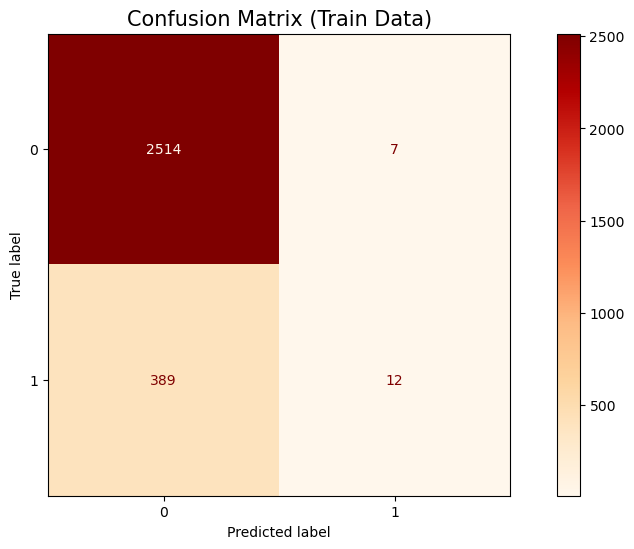

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      2521
           1       0.63      0.03      0.06       401

    accuracy                           0.86      2922
   macro avg       0.75      0.51      0.49      2922
weighted avg       0.83      0.86      0.81      2922



In [19]:
confusion_matrix_train(log_reg)
print(classification_report(y_train, log_reg_predictions_train, zero_division=True))

This is our **balanced accuracy score** for our **train data**. Balanced accuracy score measures the average of recall obtained on each class where the best score is 1 and the worst score is 0 .

In [20]:
log_balanced_accuracy_train = balanced_accuracy_score(y_train, log_reg_predictions_train)
print(f'balanced_accuracy: {log_balanced_accuracy_train}')

balanced_accuracy: 0.513574255555083


Here we define the confusion matrix function for our **test data**.

In [21]:
def confusion_matrix_test(classifier):
    fig, ax = plt.subplots(figsize=(12, 6))
    plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Greens, normalize=None, ax=ax)
    ax.set_title("Confusion Matrix (Test Data)", fontsize = 15)
    plt.show()

This is our **logistic regression** function for our **test data**. Here, we fit our data, create predictions for X_test and store the results in a classification report which will be useful later.

In [22]:
log_reg = LogisticRegression(C=10, fit_intercept=False, solver='liblinear')
log_reg.fit(X_train, y_train.HEART_STROKE.ravel())
log_reg_predictions_test = log_reg.predict(X_test)
log_reg_results_test = classification_report(y_test, log_reg_predictions_test, zero_division=True, output_dict=True)

This is our **confusion matrix and classification report** for our **test data**. The following description may be useful in our classification report.

> **precision** shows the ratio tp / (tp + fp) where tp stands for true positive and fp stands for false positives. Precision shows the propensity of the classifier not to label as positive a sample that is negative.

\

> **recall** shows the ratio tp / (tp + fn) where tp stands for true positives and fn stands for false negatives. Recall shows the propensity of the classifier to find all positive samples.

\

> **f1-score** or better known as **f-beta score** is a weighted harmonic mean of the precision and recall, where an f-beta score reaches its best score at 1 and worst score at 0.

\

> **support** is the number of occurrences of each class in y_true

C:\Users\Dell\anaconda3\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


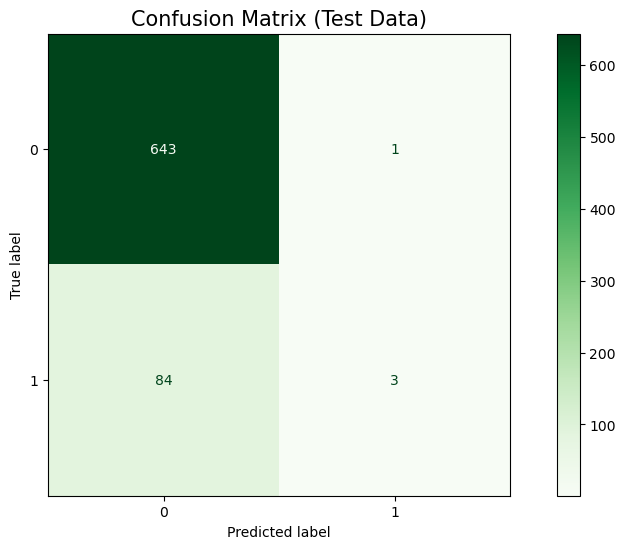

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       644
           1       0.75      0.03      0.07        87

    accuracy                           0.88       731
   macro avg       0.82      0.52      0.50       731
weighted avg       0.87      0.88      0.83       731



In [23]:
confusion_matrix_test(log_reg)
print(classification_report(y_test, log_reg_predictions_test, zero_division=True))

This is our **balanced accuracy score** for our **test data**. Balanced accuracy score measures the average of recall obtained on each class where the best score is 1 and the worst score is 0 .

In [24]:
log_balanced_accuracy_test = balanced_accuracy_score(y_test, log_reg_predictions_test)
print(f'balanced_accuracy: {log_balanced_accuracy_test}')

balanced_accuracy: 0.5164649817948169


eli5 is used to show feature importance in a table. Here we will be able to see the top features with respect to the assigned weights.

In [25]:
eli5.show_weights(log_reg, feature_names = cla_feature_names)